<a href="https://colab.research.google.com/github/annaberezov/akfie927/blob/main/Berezovski_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project One**
## Anna-Maria Berezovski
## CSC 687
### January 29, 2022

In [67]:
# Pandas is mainly used for data analysis. Pandas allows importing data from various file formats 
# such as comma-separated values, JSON, SQL, Microsoft Excel. 
# Pandas allows various data manipulation operations such as merging, reshaping, selecting, 
# as well as data cleaning, and data wrangling features.
import pandas as pd

import numpy as np

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sbn

# read in the data csv file
df = pd.read_csv('forestfires.csv')

First we will just take a look at the data we have as a table to get the names of the variables as well as just to see what variabeles are in the data

In [68]:
# To look at the shape and contents of the data
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Now we will plot the data. First, we will do a simple scatter plot using temperature, RH (relative humidity), wind, and rain as our x-axis variabels and plot them against the area to see what relationship these variables have on the area of land burned. 

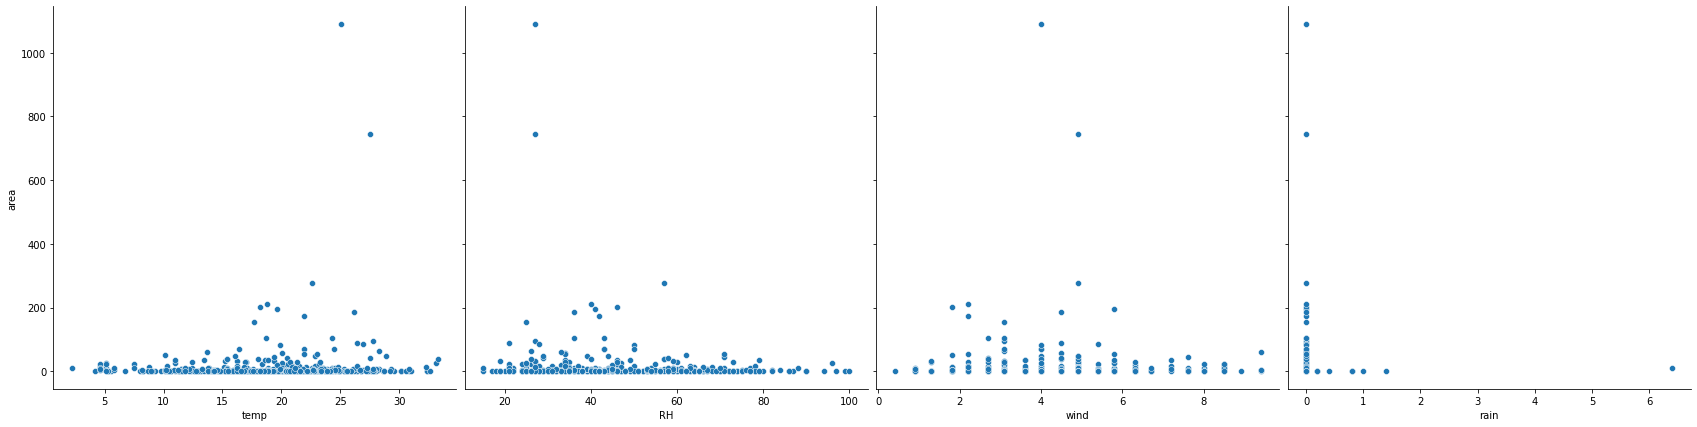

In [69]:
sbn.pairplot(df, x_vars=['temp', 'RH', 'wind', 'rain'], y_vars='area', height=6, aspect=1, kind='scatter')

plt.show()

The plots all show 2 very clear outliers. These two data points are skewing the data heavily. Now, we have two options, we can either 
1)simply remove the outliers or 
2)we can attempt to normalize the data. 
The second option is better since by simply removing the outliers, we are manipulating the data in a dishonest way. By simply normalizing the data, we are keeping all data points and therefore, keeping the data's integrity.

Now to normalize the data we will apply a logarithmic transformation. The reason we do this is simply because the source from which we get the code suggests a logorithmic transformation.

In [70]:
log_area = pd.DataFrame(df['area'])

df['log_area'] = np.log10(log_area+1)

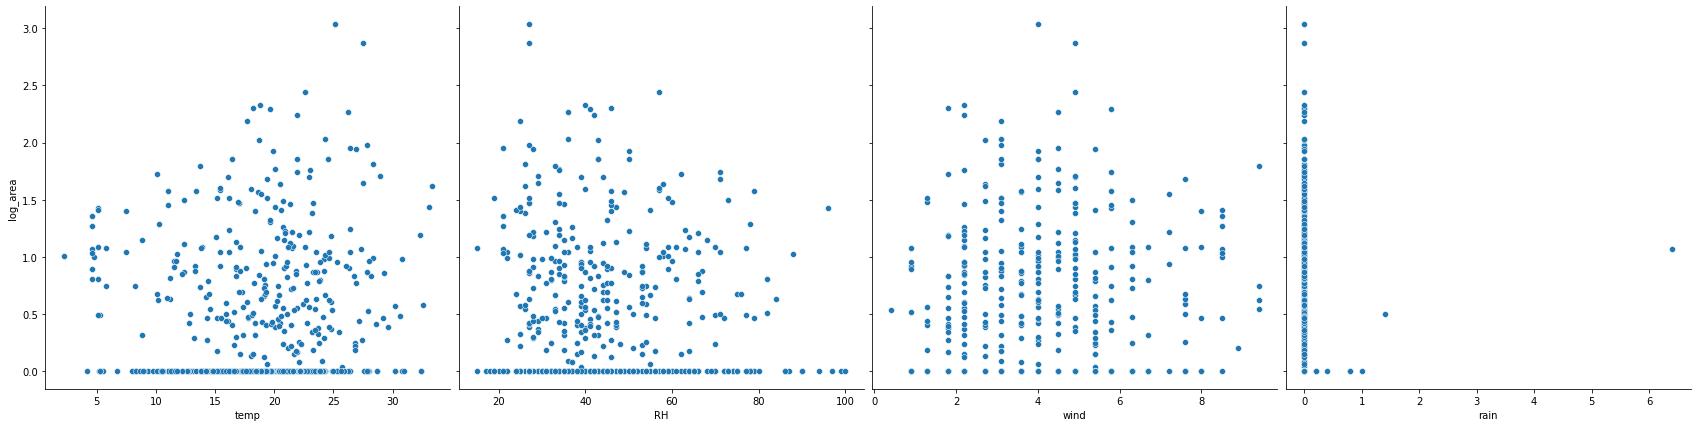

In [71]:
sbn.pairplot(df, x_vars=['temp', 'RH', 'wind', 'rain'], y_vars='log_area', height=6, aspect=1, kind='scatter')


These are all the attributes graphed side by side. I will now take them one at a time to closer look at and analyze the relationship between the burned area and the temperature, RH, wind, and rain.

# **Area vs Temperature** 

First, we will plot the original data and then we will plot the data with the logarithmic transformation applied

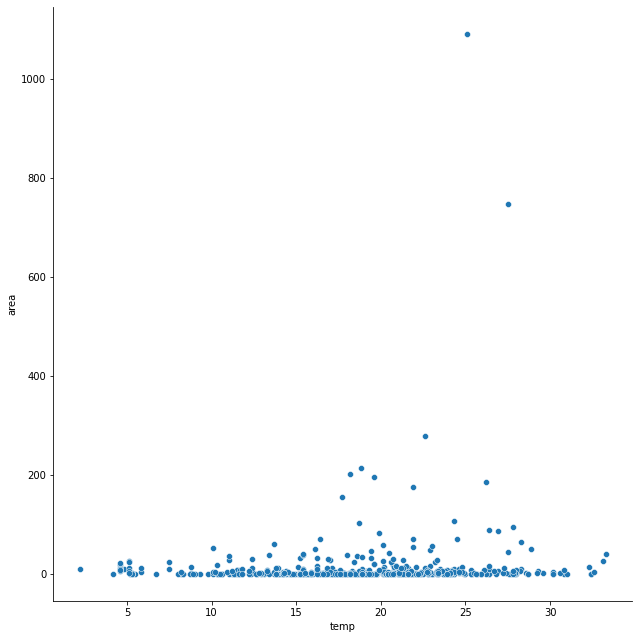

In [72]:
sbn.pairplot(df, x_vars=['temp'], y_vars='area', height=9, aspect=1, kind='scatter')

plt.show()

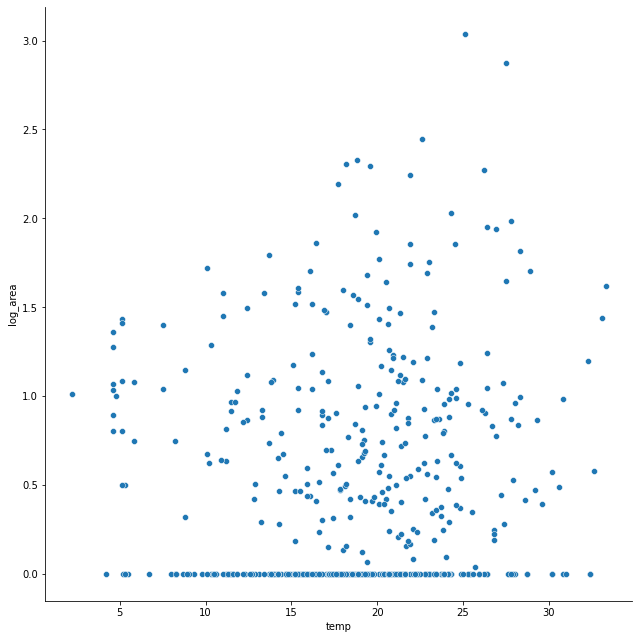

In [73]:
sbn.pairplot(df, x_vars=['temp'], y_vars='log_area', height=9, aspect=1, kind='scatter')

plt.show()

Now that we have data which is less skewed, we will now apply a simple linear regression to the modified data. 

In [74]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

# we will add an addional column to the data to first reshape it
x = df['temp'].values.reshape(-1,1)
y = df['log_area'].values.reshape(-1,1)

# we now fit the model
lm.fit(x,y)

# and now we will ask for the intercept and the slope of the model
t0, t1 = lm.intercept_[0], lm.coef_[0][0]

<function matplotlib.pyplot.show>

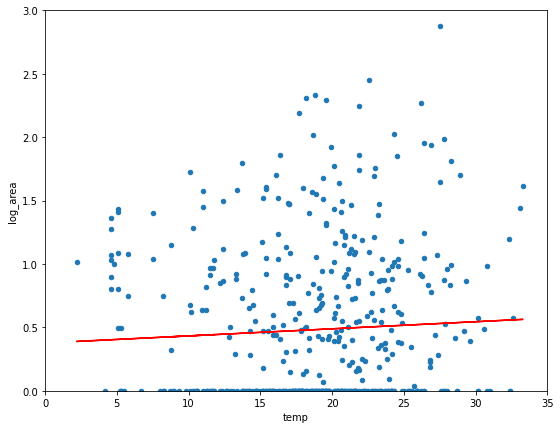

In [75]:
# now we will plot the model
df.plot(kind='scatter', x='temp', y='log_area', figsize=(9,7))

plt.axis([0, 35, 0, 3])

# here we will include the linear equation for R in the graph as a line
plt.plot(x, t0 + t1*x, 'r')

plt.show

In [76]:
t0, t1 

(0.3768402195781929, 0.0055943246406643336)

### Simple Linear Model: Area Burned = 0.38 + 0.006*Temperature

The above graph is a simple linear regression calculated directly from the given data. We will now try to train a linear model using our data to see if we can create a better fitting model

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

We have split our data into 80/20; 80% of the data will be used to train the model and 20% of the data will be used to test the model

In [78]:
# we now fit the trained model
lm.fit(x_train, y_train)

# and now we will ask for the intercept and the slope of the trained model
tt0, tt1 = lm.intercept_[0], lm.coef_[0][0]

In [79]:
tt0, tt1

(0.3657533995613518, 0.006526340518771833)

<function matplotlib.pyplot.show>

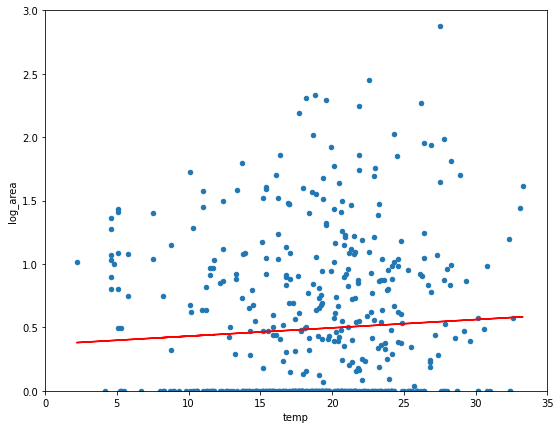

In [80]:
# now we will plot the model
df.plot(kind='scatter', x='temp', y='log_area', figsize=(9,7))

plt.axis([0, 35, 0, 3])

# here we will include the linear equation for R in the graph as a line
plt.plot(x, tt0 + tt1*x, 'r')

plt.show

So here is the plot and regression line for the training data

We will now train the model with the training data and then make predictions based on the results of the trained model

In [81]:
from sklearn.metrics import r2_score, mean_squared_error

# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)

print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: -0.004574997224866095
Mean squared error: 0.33721489144635675


### R2 Score: -0.005
### Mean Square Error: 0.337

# **Area vs Relative Humidity** 

First, we will plot the original data and then we will plot the data with the logarithmic transformation applied

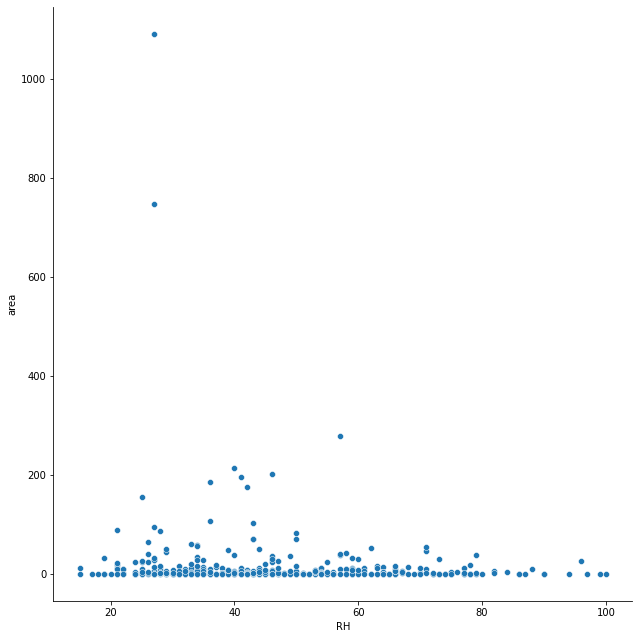

In [82]:
sbn.pairplot(df, x_vars=['RH'], y_vars='area', height=9, aspect=1, kind='scatter')

plt.show()

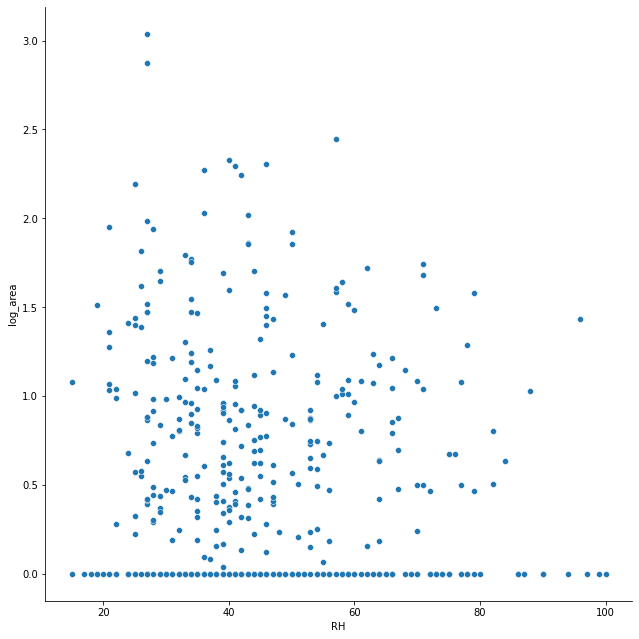

In [83]:
sbn.pairplot(df, x_vars=['RH'], y_vars='log_area', height=9, aspect=1, kind='scatter')

plt.show()

Now that we have data which is less skewed, we will now apply a simple linear regression to the modified data. 

In [84]:
lm = linear_model.LinearRegression()

# we will add an addional column to the data to first reshape it
x = df['RH'].values.reshape(-1,1)
y = df['log_area'].values.reshape(-1,1)

# we now fit the model
lm.fit(x,y)

# and now we will ask for the intercept and the slope of the model
t0, t1 = lm.intercept_[0], lm.coef_[0][0]

<function matplotlib.pyplot.show>

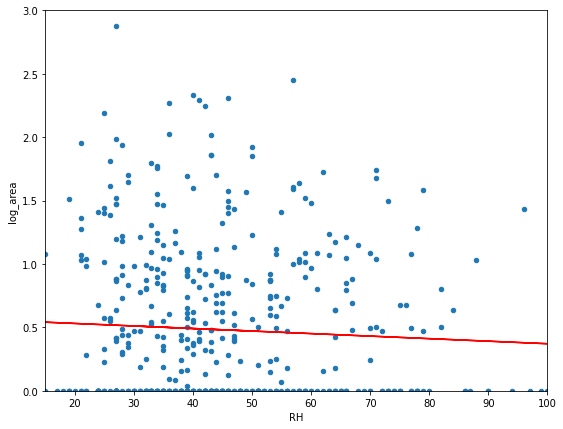

In [85]:
# now we will plot the model
df.plot(kind='scatter', x='RH', y='log_area', figsize=(9,7))

plt.axis([15, 100, 0, 3])

# here we will include the linear equation for R in the graph as a line
plt.plot(x, t0 + t1*x, 'r')

plt.show

In [86]:
t0, t1

(0.5709689642135138, -0.0019972950532002125)

### Simple Linear Model: Area Burned = 0.57 - 0.002*RH

The above graph is a simple linear regression calculated directly from the given data. We will now try to train a linear model using our data to see if we can create a better fitting model

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

We have split our data into 80/20; 80% of the data will be used to train the model and 20% of the data will be used to test the model

In [88]:
# we now fit the trained model
lm.fit(x_train, y_train)

# and now we will ask for the intercept and the slope of the trained model
tt0, tt1 = lm.intercept_[0], lm.coef_[0][0]

In [89]:
tt0, tt1

(0.5682676985101484, -0.0018198158691746106)

<function matplotlib.pyplot.show>

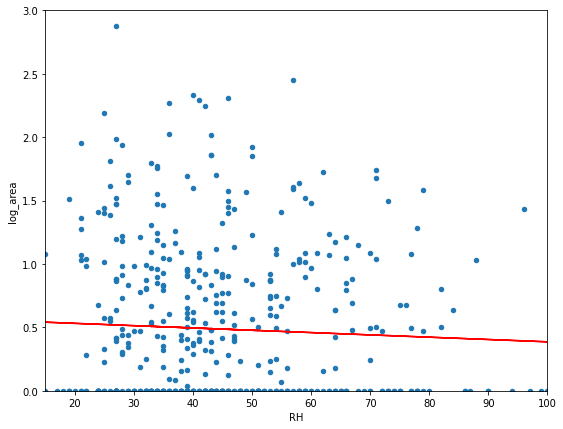

In [90]:
# now we will plot the model
df.plot(kind='scatter', x='RH', y='log_area', figsize=(9,7))

plt.axis([15, 100, 0, 3])

# here we will include the linear equation for R in the graph as a line
plt.plot(x, tt0 + tt1*x, 'r')

plt.show

So here is the plot and regression line for the training data

We will now train the model with the training data and then make predictions based on the results of the trained model

In [91]:
# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)

print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: 0.002807391126103842
Mean squared error: 0.33473677752428593


### R2 Score: 0.003
### Mean Square Error: 0.335

# **Area vs Wind** 

First, we will plot the original data and then we will plot the data with the logarithmic transformation applied

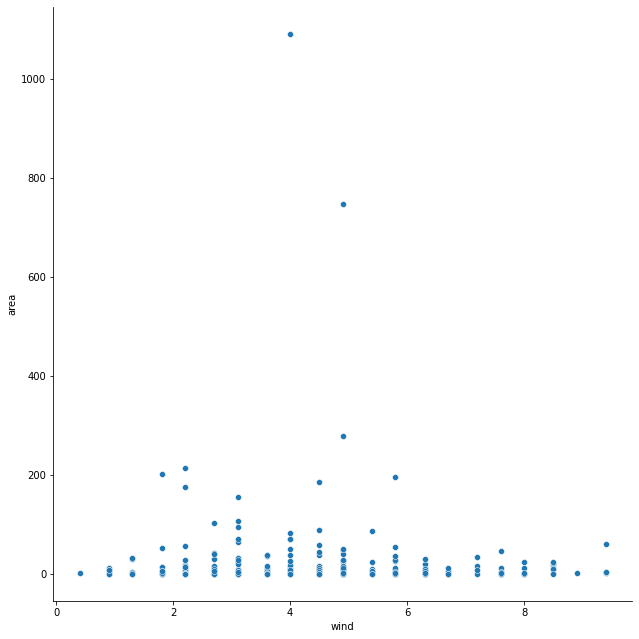

In [92]:
sbn.pairplot(df, x_vars=['wind'], y_vars='area', height=9, aspect=1, kind='scatter')

plt.show()

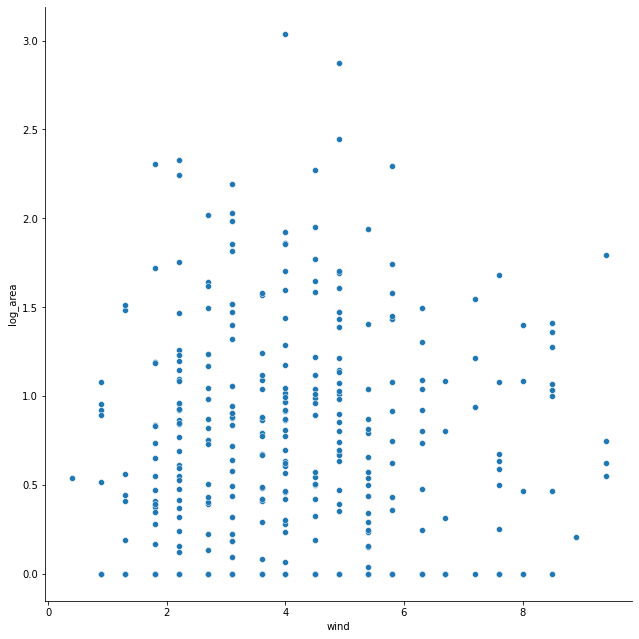

In [93]:
sbn.pairplot(df, x_vars=['wind'], y_vars='log_area', height=9, aspect=1, kind='scatter')

plt.show()

Now that we have data which is less skewed, we will now apply a simple linear regression to the modified data. 

In [94]:
lm = linear_model.LinearRegression()

# we will add an addional column to the data to first reshape it
x = df['wind'].values.reshape(-1,1)
y = df['log_area'].values.reshape(-1,1)

# we now fit the model
lm.fit(x,y)

# and now we will ask for the intercept and the slope of the model
t0, t1 = lm.intercept_[0], lm.coef_[0][0]

<function matplotlib.pyplot.show>

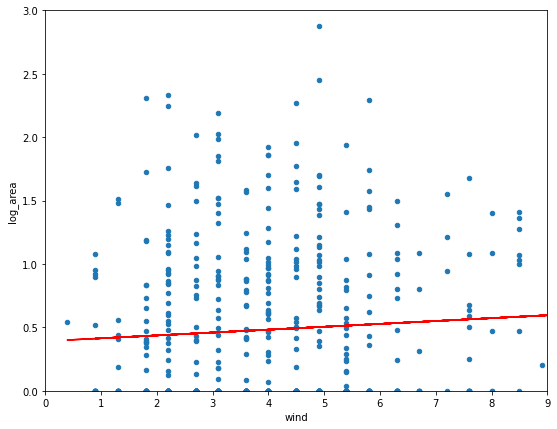

In [95]:
# now we will plot the model
df.plot(kind='scatter', x='wind', y='log_area', figsize=(9,7))

plt.axis([0, 9, 0, 3])

# here we will include the linear equation for R in the graph as a line
plt.plot(x, t0 + t1*x, 'r')

plt.show

In [96]:
t0, t1

(0.39130227060318623, 0.022702621810896988)

### Simple Linear Model: Area Burned = 0.39 - 0.023*Wind

The above graph is a simple linear regression calculated directly from the given data. We will now try to train a linear model using our data to see if we can create a better fitting model

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

We have split our data into 80/20; 80% of the data will be used to train the model and 20% of the data will be used to test the model

In [98]:
# we now fit the trained model
lm.fit(x_train, y_train)

# and now we will ask for the intercept and the slope of the trained model
tt0, tt1 = lm.intercept_[0], lm.coef_[0][0]

In [99]:
tt0, tt1

(0.3971696198268752, 0.022558916067612837)

<function matplotlib.pyplot.show>

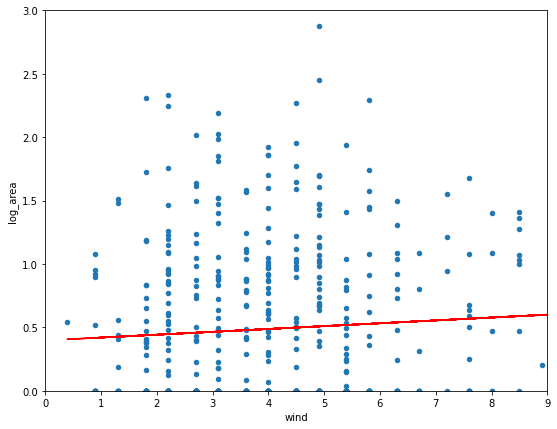

In [100]:
# now we will plot the model
df.plot(kind='scatter', x='wind', y='log_area', figsize=(9,7))

plt.axis([0, 9, 0, 3])

# here we will include the linear equation for R in the graph as a line
plt.plot(x, tt0 + tt1*x, 'r')

plt.show

So here is the plot and regression line for the training data

We will now train the model with the training data and then make predictions based on the results of the trained model

In [101]:
# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)

print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: 0.0023451377048031574
Mean squared error: 0.33489194636455694


### R2 Score: 0.002
### Mean Square Error: 0.335

# **Area vs Rain** 

First, we will plot the original data and then we will plot the data with the logarithmic transformation applied

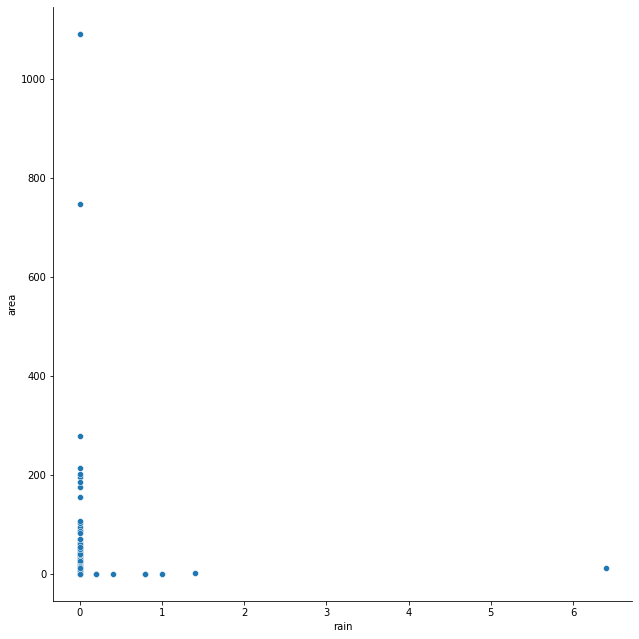

In [102]:
sbn.pairplot(df, x_vars=['rain'], y_vars='area', height=9, aspect=1, kind='scatter')

plt.show()

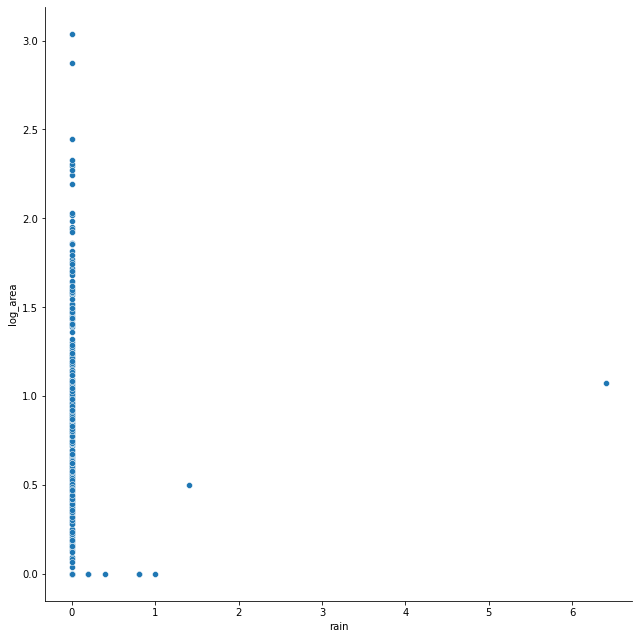

In [103]:
sbn.pairplot(df, x_vars=['rain'], y_vars='log_area', height=9, aspect=1, kind='scatter')

plt.show()

Now that we have data which is less skewed, but this graph is still skewed. But, we cannot do anything else to this data as we are comparing it with the three other variables and if we were to change this dataset further, we would need to modify the others as well.

In [104]:
lm = linear_model.LinearRegression()

# we will add an addional column to the data to first reshape it
x = df['rain'].values.reshape(-1,1)
y = df['log_area'].values.reshape(-1,1)

# we now fit the model
lm.fit(x,y)

# and now we will ask for the intercept and the slope of the model
t0, t1 = lm.intercept_[0], lm.coef_[0][0]

<function matplotlib.pyplot.show>

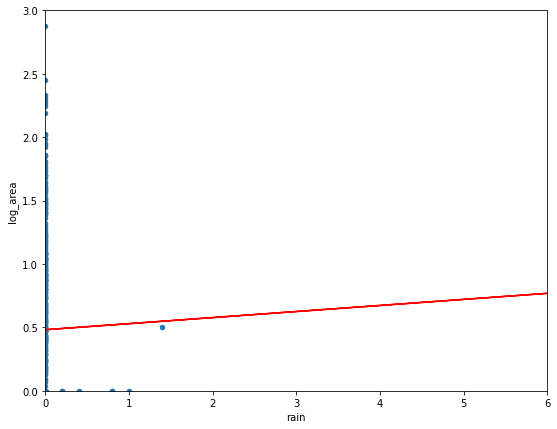

In [105]:
# now we will plot the model
df.plot(kind='scatter', x='rain', y='log_area', figsize=(9,7))

plt.axis([0, 6, 0, 3])

# here we will include the linear equation for R in the graph as a line
plt.plot(x, t0 + t1*x, 'r')

plt.show

In [106]:
t0, t1

(0.48147604987363146, 0.047836775053030425)

### Simple Linear Model: Area Burned = 0.48 + 0.048*Rain

The above graph is a simple linear regression calculated directly from the given data. We will now try to train a linear model using our data to see if we can create a better fitting model

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

We have split our data into 80/20; 80% of the data will be used to train the model and 20% of the data will be used to test the model

In [108]:
# we now fit the trained model
lm.fit(x_train, y_train)

# and now we will ask for the intercept and the slope of the trained model
tt0, tt1 = lm.intercept_[0], lm.coef_[0][0]

In [109]:
tt0, tt1

(0.48714565275337157, 0.053105457511243036)

<function matplotlib.pyplot.show>

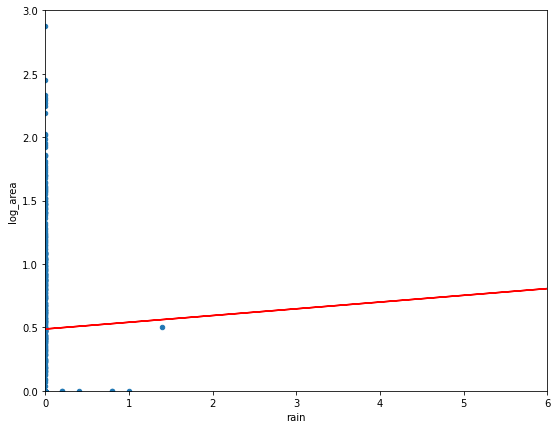

In [110]:
# now we will plot the model
df.plot(kind='scatter', x='rain', y='log_area', figsize=(9,7))

plt.axis([0, 6, 0, 3])

# here we will include the linear equation for R in the graph as a line
plt.plot(x, tt0 + tt1*x, 'r')

plt.show

So here is the plot and regression line for the training data

We will now train the model with the training data and then make predictions based on the results of the trained model

In [111]:
# train the model using the training set
y_train_pred = lm.predict(x_train)

# make predictions using the testing set
y_test_pred = lm.predict(x_test)

print('R2 score:',            r2_score(y_test, y_test_pred))
print('Mean squared error:', mean_squared_error(y_test, y_test_pred))

R2 score: -0.0033158753354052273
Mean squared error: 0.33679223046788803


### R2 Score: -0.003
### Mean Square Error: 0.337

# Conclusion

  In conclusion, from this data, it is impossible to extract any sort of relationship between the different variables (temperature, relative humidity, wind, and rain) and the area burned in a forest fire. Here are all the results:

---


  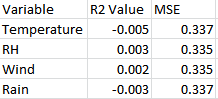


---

From this table we can see that we have the smaller amount of error when predicting the relationship between relative humidity and area burned as well as wind and area burned. But, these predictions overall are not very accurate. 